In [1]:
from sympy import *
init_printing()
from sympy.physics.mechanics import *

In [2]:
# 惯性坐标系， 外圈坐标系
N = ReferenceFrame('N')

In [3]:
# 内圈位移
delta_x, delta_y, delta_z, gamma_x, gamma_y = symbols('delta_x, delta_y, delta_z, gamma_x, gamma_y ')
delta_x, delta_y, delta_z, gamma_x, gamma_y 

In [4]:
# left内圈角位移后的坐标系
I_left = N.orientnew('I_l', 'Body', [gamma_x, gamma_y, 0], '123')

# right内圈角位移后的坐标系
I_right = I_left.orientnew('I_r', 'Axis',  [pi, N.x])

#I = N.orientnew('I', 'Body', [gamma_x, gamma_y, 0], '123')

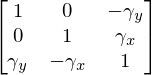

In [5]:
# 角位移小变形条件下，gamma_x*gamma_y 为零
I_left.dcm(N).subs({cos(gamma_y):1,cos(gamma_x):1,sin(gamma_x):gamma_x,sin(gamma_y):gamma_y}).subs({gamma_x*gamma_y:0})

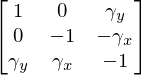

In [6]:
I_right.dcm(N).subs({cos(gamma_y):1,cos(gamma_x):1,sin(gamma_x):gamma_x,sin(gamma_y):gamma_y}).subs({gamma_x*gamma_y:0,gamma_y*gamma_y:0})

In [7]:
# left内圈受力后原点的位移
delta_0 = symbols('delta_0')  # preload
Inner_1 = delta_x * N.x + delta_y * N.y + (delta_z + delta_0) * N.z   
# right
Inner_2 = delta_x * N.x + delta_y * N.y + (delta_z - delta_0) * N.z   
Inner_2
Inner_2 - Inner_1

In [8]:
Dw,lw,Rs,rm,alpha,beta,gamma,theta,epsilon,rho_k,Z,rz,psi = symbols('D_w,l_w,R_s,r_m,alpha,beta,gamma,theta,epsilon,rho_k,Z,r_z,psi')
e, e_w, e_r = symbols('e, e_w, e_r')

In [9]:
# 外圈滚道 在惯性坐标系下的矢量，1左侧，2 右侧
r_e1 = (rm - rz * sin(gamma) + rho_k * cos(gamma)) * cos(psi) * N.x + \
       (rm - rz * sin(gamma) + rho_k * cos(gamma)) * sin(psi) * N.y + \
     (-e_w + rz * cos(gamma) + rho_k * sin(gamma)) *            N.z
r_e2 = (rm - rz * sin(gamma) + rho_k * cos(gamma)) * cos(psi) * N.x + \
       (rm - rz * sin(gamma) + rho_k * cos(gamma)) * sin(psi) * N.y + \
     (e_w - (rz * cos(gamma) + rho_k * sin(gamma)))*            N.z       

In [10]:
r_e2-r_e1

In [11]:
# left 内圈滚道 在惯性坐标系下的矢量
r_i10 = (rm - rz * sin(gamma) - rho_k * cos(gamma)) * cos(psi) * N.x + \
        (rm - rz * sin(gamma) - rho_k * cos(gamma)) * sin(psi) * N.y + \
      (-e_w + rz * cos(gamma) - rho_k * sin(gamma)) *            N.z

# left 内圈滚道 变形后在惯性坐标系下的矢量
r_i11 = (rm - rz * sin(gamma) - rho_k * cos(gamma)) * cos(psi) * I_left.x + \
        (rm - rz * sin(gamma) - rho_k * cos(gamma)) * sin(psi) * I_left.y + \
      (-e_w + rz * cos(gamma) - rho_k * sin(gamma))            * I_left.z + Inner_1

# right 内圈滚道 在惯性坐标系下的矢量
r_i20 = (rm - rz * sin(gamma) - rho_k * cos(gamma)) * cos(psi) * N.x + \
        (rm - rz * sin(gamma) - rho_k * cos(gamma)) * sin(psi) * N.y + \
       (e_w - rz * cos(gamma) + rho_k * sin(gamma)) *            N.z
        
#  right 内圈滚道 变形后在惯性坐标系下的矢量
r_i21 = (rm - rz * sin(gamma) - rho_k * cos(gamma)) * cos(psi) * I_right.x + \
        (rm - rz * sin(gamma) - rho_k * cos(gamma)) * sin(psi) * I_right.y + \
       (e_w - rz * cos(gamma) + rho_k * sin(gamma))            * I_right.z + Inner_2        

In [12]:
(r_i10).express(N)

In [13]:
(r_i20).express(N)

### 内滚道

In [18]:
r_i11.express(N).subs({cos(gamma_y):1,cos(gamma_x):1,sin(gamma_x):gamma_x,sin(gamma_y):gamma_y}).subs({gamma_x*gamma_y:0}).simplify()  

In [19]:
r_i21.express(N).subs({cos(gamma_y):1,cos(gamma_x):1,sin(gamma_x):gamma_x,sin(gamma_y):gamma_y}).subs({gamma_x*gamma_y:0,gamma_y*gamma_y:0}).simplify() 

### 档边

In [20]:
lambda_f = symbols('lambda_f')

# left 档边接触点 惯性坐标系下的矢量
r_f10 = (rm - Rs * cos(lambda_f) * sin(gamma) + Rs * sin(theta)) * cos(psi) * N.x + \
        (rm - Rs * cos(lambda_f) * sin(gamma) + Rs * sin(theta)) * sin(psi) * N.y + \
      (-e_w + Rs * cos(lambda_f) * cos(gamma) - Rs * cos(theta)) *            N.z

# right 档边接触点 惯性坐标系下的矢量
r_f20 = (rm - Rs * cos(lambda_f) * sin(gamma) + Rs * sin(theta)) * cos(psi) * N.x + \
        (rm - Rs * cos(lambda_f) * sin(gamma) + Rs * sin(theta)) * sin(psi) * N.y + \
       (e_w - Rs * cos(lambda_f) * cos(gamma) + Rs * cos(theta)) * N.z 
        
# left 档边接触点 变形后在惯性坐标系下的矢量
r_f11 = (rm - Rs * cos(lambda_f) * sin(gamma) + Rs * sin(theta)) * cos(psi) * I_left.x + \
        (rm - Rs * cos(lambda_f) * sin(gamma) + Rs * sin(theta)) * sin(psi) * I_left.y + \
        (-e_w  + Rs * cos(lambda_f) * cos(gamma) - Rs * cos(theta))         * I_left.z + Inner_1

# right 档边接触点 变形后在惯性坐标系下的矢量
r_f21 = (rm - Rs * cos(lambda_f) * sin(gamma) + Rs * sin(theta)) * cos(psi) * I_right.x + \
        (rm - Rs * cos(lambda_f) * sin(gamma) + Rs * sin(theta)) * sin(psi) * I_right.y + \
       (e_w - Rs * cos(lambda_f) * cos(gamma) + Rs * cos(theta))            * I_right.z + Inner_2

### 滚子

In [21]:
# 滚子的原点
Roller_1 = rm * cos(psi) * N.x + rm * sin(psi) * N.y - e_w * N.z
Roller_2 = rm * cos(psi) * N.x + rm * sin(psi) * N.y + e_w * N.z

In [22]:
u_y1, u_z1, phi_x1, u_y2, u_z2, phi_x2 = symbols('u_y1, u_z1, phi_x1, u_y2, u_z2, phi_x2')
# left 滚子的坐标系
R_10 = N.orientnew('R10', 'Body', [psi, gamma, 0], '312')
# 滚子角位移后的坐标系
R1 = R_10.orientnew('R1', 'Axis', [phi_x1, R_10.x])

In [23]:
# 滚子原点的位移
Roller_d1 = u_y1 * R_10.y + u_z1 * R_10.z
Roller_d1

In [24]:
# 滚子变形后 与外滚道接触处的位置矢量
rho_e1_d = Roller_1 + Roller_d1 + rho_k * R1.y + rz * R1.z
# inner
rho_i1_d = Roller_1 + Roller_d1 - rho_k * R1.y + rz * R1.z
# flange
rho_f1_d = Roller_1 + Roller_d1 - Rs * sin(gamma-theta) * R1.y + Rs * (cos(lambda_f) - cos(gamma-theta)) * R1.z

In [25]:
rho_f1_d

In [26]:
# 滚子的坐标系
R_20 = N.orientnew('R20', 'Body', [pi, -psi, gamma], '231')

# 滚子角位移后的坐标系
R2 = R_20.orientnew('R2', 'Axis', [phi_x2, R_20.x])

# 滚子原点的位移
Roller_d2 = u_y2 * R_20.y + u_z2 * R_20.z

# 滚子变形后 与外滚道接触处的位置矢量
rho_e2_d = Roller_2 + Roller_d2 + rho_k * R2.y + rz * R2.z

# inner
rho_i2_d = Roller_2 + Roller_d2 - rho_k * R2.y + rz * R2.z

# flange
rho_f2_d = Roller_2 + Roller_d2 - Rs * sin(gamma-theta) * R2.y + Rs * (cos(lambda_f) - cos(gamma-theta)) * R2.z


In [27]:
#left roller to outter
rho_e1 = rho_k * R_10.y + rz * R_10.z
# right roller to inner
rho_e2 = rho_k * R_20.y + rz * R_20.z

In [28]:
(Roller_1 + rho_e1  -  r_e1).express(N).simplify().subs({psi:0})

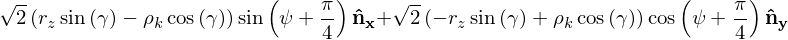

In [29]:
(Roller_2 + rho_e2 -  r_e2).express(N).simplify()

In [30]:
#left roller to inner
rho_i1 = -rho_k * R_10.x + rz * R_10.z
# right roller to inner
rho_i2 = -rho_k * R_20.x + rz * R_20.z

In [32]:
# left roller to flange
rho_f1 = -Rs * sin(gamma-theta) * R_10.x + Rs * (cos(lambda_f) - cos(gamma-theta)) * R_10.z
# right roller to flange
rho_f2 = -Rs * sin(gamma-theta) * R_20.x + Rs * (cos(lambda_f) - cos(gamma-theta)) * R_20.z

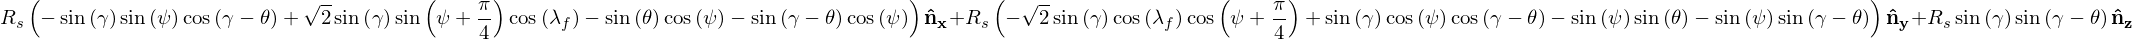

In [33]:
(Roller_1 + rho_f1 -  r_f10).express(N).simplify()

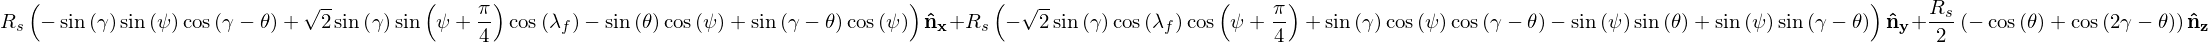

In [34]:
(Roller_2 + rho_f2 -  r_f20).express(N).simplify()

In [35]:
Roller_2 + rho_f2 -  r_f20

## 变形后

In [36]:
# left外滚道单位法向矢量
n_o1 = -cos(psi) * cos(alpha) * N.x  - sin(psi) * cos(alpha) * N.y - sin(alpha) * N.z

delta_o1 = dot(r_e1 - rho_e1_d, n_o1).simplify()
delta_o1

In [37]:
print(delta_o1)

r_z*sin(alpha)*cos(gamma + phi_x1) - r_z*sin(alpha - gamma) + rho_k*sin(alpha)*sin(gamma + phi_x1) - rho_k*cos(alpha - gamma) + u_y1*sin(alpha)*sin(gamma) + u_z1*sin(alpha)*cos(gamma)


In [38]:
# right外滚道单位法向矢量
n_o2 = -cos(psi) * cos(alpha) * N.x  - sin(psi) * cos(alpha) * N.y + sin(alpha) * N.z

delta_o2 = dot(r_e2 - rho_e2_d, n_o2).simplify()
delta_o2

In [39]:
print(delta_o2)

r_z*sin(alpha)*cos(gamma + phi_x2) - r_z*sin(alpha - gamma) + rho_k*sin(alpha)*sin(gamma + phi_x2) - rho_k*cos(alpha - gamma) + u_y2*sin(alpha)*sin(gamma) + u_z2*sin(alpha)*cos(gamma)


In [40]:
#内滚道单位法向矢量
n_i1 = cos(psi) * cos(beta) * N.x + sin(psi) * cos(beta) * N.y + sin(beta) * N.z

delta_i1 = dot(r_i11 - rho_i1_d, n_i1).simplify()
delta_i1

In [41]:
delta_i11 = delta_i1.subs({cos(gamma_y):1,cos(gamma_x):1,sin(gamma_x):gamma_x,sin(gamma_y):gamma_y}).subs({gamma_x*gamma_y:0}).simplify() 
delta_i11

In [42]:
print(delta_i11)

delta_0*sin(beta) + delta_x*cos(beta)*cos(psi) + delta_y*sin(psi)*cos(beta) + delta_z*sin(beta) + e_w*gamma_x*sin(psi)*cos(beta) - e_w*gamma_y*cos(beta)*cos(psi) + gamma_x*r_m*sin(beta)*sin(psi) - gamma_x*r_z*sin(psi)*cos(beta - gamma) - gamma_x*rho_k*sin(psi)*sin(beta - gamma) - gamma_y*r_m*sin(beta)*cos(psi) + gamma_y*r_z*cos(psi)*cos(beta - gamma) + gamma_y*rho_k*sin(beta - gamma)*cos(psi) - r_z*sin(beta)*cos(gamma + phi_x1) + r_z*sin(beta - gamma) + rho_k*sin(beta)*sin(gamma + phi_x1) - rho_k*cos(beta - gamma) - u_y1*sin(beta)*sin(gamma) - u_z1*sin(beta)*cos(gamma)


In [43]:
#内滚道单位法向矢量
n_i2 = cos(psi) * cos(beta) * N.x + sin(psi) * cos(beta) * N.y - sin(beta) * N.z

delta_i2 = dot(r_i21 - rho_i2_d, n_i2).simplify()
delta_i2

In [45]:
print(delta_i2)

-r_z*sin(beta)*cos(gamma + phi_x2) + rho_k*sin(beta)*sin(gamma + phi_x2) - u_y2*sin(beta)*sin(gamma) - u_z2*sin(beta)*cos(gamma) + (delta_x - r_m*cos(psi))*cos(beta)*cos(psi) + (delta_y - r_m*sin(psi))*sin(psi)*cos(beta) - (sin(beta)*sin(gamma_x) - sin(psi)*cos(beta)*cos(gamma_x))*(-r_m + r_z*sin(gamma) + rho_k*cos(gamma))*sin(psi) + (delta_0 - delta_z + e_w)*sin(beta) + (e_w - r_z*cos(gamma) + rho_k*sin(gamma))*(sin(beta)*cos(gamma_x)*cos(gamma_y) + sin(gamma_x)*sin(psi)*cos(beta)*cos(gamma_y) + sin(gamma_y)*cos(beta)*cos(psi)) + (-r_m + r_z*sin(gamma) + rho_k*cos(gamma))*(sin(beta)*sin(gamma_y)*cos(gamma_x) + sin(gamma_x)*sin(gamma_y)*sin(psi)*cos(beta) - cos(beta)*cos(gamma_y)*cos(psi))*cos(psi)


In [46]:
#档边单位法向矢量
n_f1 = -cos(psi) * sin(theta) * N.x  - sin(psi) * sin(theta) * N.y + cos(theta) * N.z

delta_f1 = dot(r_f11 - rho_f1_d, n_f1).simplify()
delta_f1

In [47]:
deltaf11 = delta_f1.subs({cos(gamma_y):1,cos(gamma_x):1,sin(gamma_x):gamma_x,sin(gamma_y):gamma_y}).subs({gamma_x*gamma_y:0}).simplify() 
deltaf11

In [48]:
print(deltaf11)

-R_s*gamma_x*sin(psi)*sin(gamma - theta)*cos(lambda_f) + R_s*gamma_y*sin(gamma - theta)*cos(lambda_f)*cos(psi) - R_s*cos(lambda_f)*cos(theta)*cos(gamma + phi_x1) + R_s*cos(lambda_f)*cos(gamma - theta) + R_s*cos(theta)*cos(phi_x1 + theta) - R_s + delta_0*cos(theta) - delta_x*sin(theta)*cos(psi) - delta_y*sin(psi)*sin(theta) + delta_z*cos(theta) - e_w*gamma_x*sin(psi)*sin(theta) + e_w*gamma_y*sin(theta)*cos(psi) + gamma_x*r_m*sin(psi)*cos(theta) - gamma_y*r_m*cos(psi)*cos(theta) - u_y1*sin(gamma)*cos(theta) - u_z1*cos(gamma)*cos(theta)


In [49]:
#档边单位法向矢量
n_f2 = -cos(psi) * sin(theta) * N.x  - sin(psi) * sin(theta) * N.y - cos(theta) * N.z

delta_f2 = dot(r_f21 - rho_f2_d, n_f2).simplify()
delta_f2

In [50]:
deltaf21 = delta_f2.subs({cos(gamma_y):1,cos(gamma_x):1,sin(gamma_x):gamma_x,sin(gamma_y):gamma_y}).subs({gamma_x*gamma_y:0}).simplify() 
deltaf21

In [51]:
print(deltaf21)

-R_s*(cos(lambda_f) - cos(gamma - theta))*cos(theta)*cos(gamma + phi_x2) + R_s*sin(gamma + phi_x2)*sin(gamma - theta)*cos(theta) - u_y2*sin(gamma)*cos(theta) - u_z2*cos(gamma)*cos(theta) - (delta_x - r_m*cos(psi))*sin(theta)*cos(psi) - (delta_y - r_m*sin(psi))*sin(psi)*sin(theta) + (gamma_x*cos(theta) + sin(psi)*sin(theta))*(-R_s*sin(gamma)*cos(lambda_f) + R_s*sin(theta) + r_m)*sin(psi) - (gamma_y*cos(theta) + sin(theta)*cos(psi))*(-R_s*sin(gamma)*cos(lambda_f) + R_s*sin(theta) + r_m)*cos(psi) + (delta_0 - delta_z + e_w)*cos(theta) - (-R_s*cos(gamma)*cos(lambda_f) + R_s*cos(theta) + e_w)*(gamma_x*sin(psi)*sin(theta) + gamma_y*sin(theta)*cos(psi) - cos(theta))


外滚道平衡

In [52]:
left_moment = cross(r_e1,n_o1).simplify()

In [53]:
print(left_moment)

(-e_w*cos(alpha) - r_m*sin(alpha) + r_z*cos(alpha - gamma) - rho_k*sin(alpha - gamma))*sin(psi)*N.x + (e_w*cos(alpha) + r_m*sin(alpha) - r_z*cos(alpha - gamma) + rho_k*sin(alpha - gamma))*cos(psi)*N.y


In [54]:
right_moment = cross(r_e2, n_o2).simplify()

In [55]:
print(right_moment)

(e_w*cos(alpha) + r_m*sin(alpha) - r_z*cos(alpha - gamma) + rho_k*sin(alpha - gamma))*sin(psi)*N.x + (-e_w*cos(alpha) - r_m*sin(alpha) + r_z*cos(alpha - gamma) - rho_k*sin(alpha - gamma))*cos(psi)*N.y


内滚道平衡

In [56]:
left_moment = cross(r_i10, n_i1).simplify()
left_moment

In [57]:
print(left_moment)

(e_w*cos(beta) + r_m*sin(beta) - r_z*cos(beta - gamma) - rho_k*sin(beta - gamma))*sin(psi)*N.x + (-e_w*cos(beta) - r_m*sin(beta) + r_z*cos(beta - gamma) + rho_k*sin(beta - gamma))*cos(psi)*N.y


In [60]:
left_moment = cross(r_i10, n_i1).simplify()
left_moment

In [59]:
right_moment = cross(r_i20, n_i2).simplify()
right_moment

In [61]:
print(right_moment)

(-e_w*cos(beta) - r_m*sin(beta) + r_z*cos(beta - gamma) + rho_k*sin(beta - gamma))*sin(psi)*N.x + (e_w*cos(beta) + r_m*sin(beta) - r_z*cos(beta - gamma) - rho_k*sin(beta - gamma))*cos(psi)*N.y


In [62]:
left_Flange = cross(r_f10, n_f1).simplify()
left_Flange

In [63]:
print(left_Flange)

(-R_s*sin(gamma - theta)*cos(lambda_f) - e_w*sin(theta) + r_m*cos(theta))*sin(psi)*N.x + (R_s*sin(gamma - theta)*cos(lambda_f) + e_w*sin(theta) - r_m*cos(theta))*cos(psi)*N.y


In [64]:
right_Flange = cross(r_f20, n_f2).simplify()
right_Flange

In [65]:
print(right_Flange)

(R_s*sin(gamma - theta)*cos(lambda_f) + e_w*sin(theta) - r_m*cos(theta))*sin(psi)*N.x + (-R_s*sin(gamma - theta)*cos(lambda_f) - e_w*sin(theta) + r_m*cos(theta))*cos(psi)*N.y
